# 8th Session

# More on Optimization and Exploring Matrices

**In our previous session, we explored utility optimization using the Cobb-Douglas production function, visualizing our findings through 3D plots and contour diagrams. This time, we will delve deeper into the mathematical foundations of optimization by introducing the concept of second derivatives and their implications for finding optimal solutions.**

**The second derivative of a function provides crucial information about its curvature and concavity. Specifically, it helps us determine whether a critical point (where the first derivative is zero) is a local maximum, local minimum, or a saddle point.**

## Local Maximum

$$
\text{If } z_{xx} < 0: \text{ This indicates that the function is concave down with respect to } x. \\ \text{ It suggests that the function is "bending downwards" in the } x \text{ direction.} \\[1em]

\text{If } z_{yy} < 0: \text{ This indicates that the function is concave down with respect to } y. \\[1em]

\text{For a function to have a local maximum at a critical point, you typically want the following conditions to hold:} \\[1em]

1. \text{The first derivatives } z_x \text{ and } z_y \text{ should be zero at that point (indicating a critical point).} \\[1em]

2. \text{The second derivatives should satisfy the following conditions:} \\[1em]
    z_{xx} < 0 \text{ (concave down in the } x \text{ direction)} \\[1em]
    z_{yy} < 0 \text{ (concave down in the } y \text{ direction)} \\[1em]

3. \text{The determinant of the Hessian matrix,} \\[1em]
   H = z_{xx} z_{yy} - (z_{xy})^2, \\[1em]
   \text{ should be positive, which indicates that the critical point is a local maximum.}
$$

## Example

The function is given by:

$$
f(x, y) = -2x^2 - 3y^2 + 12x + 18y + 10
$$

In [36]:
import sympy as sp

#define the variables
x, y = sp.symbols('x y')

#define the function
f = -2*x**2 - 3*y**2 + 12*x + 18*y + 10

#calculate the first derivatives
f_x = sp.diff(f, x)
f_y = sp.diff(f, y)

#find critical points
critical_points = sp.solve([f_x, f_y], (x, y))

#calculate second derivatives
f_xx = sp.diff(f, x, 2)
f_yy = sp.diff(f, y, 2)
f_xy = sp.diff(f_x, y)

#check the Hessian determinant
H = f_xx * f_yy - f_xy**2

print("Critical Points:", critical_points)

#extracting critical point values from the dictionary
if isinstance(critical_points, dict):
    point = (critical_points[x], critical_points[y])
    #evaluate hessian and second derivatives at the critical point
    H_value = H.subs({x: point[0], y: point[1]})
    f_xx_value = f_xx.subs({x: point[0], y: point[1]})
    f_yy_value = f_yy.subs({x: point[0], y: point[1]})

    print(f"At point {point}: H = {H_value}, f_xx = {f_xx_value}, f_yy = {f_yy_value}")

    #check conditions for local maximum
    if f_xx_value < 0 and f_yy_value < 0 and H_value > 0:
        print("This critical point is a local maximum.")
    else:
        print("This critical point is not a local maximum.")
else:
    print("No critical points found.")

Critical Points: {x: 3, y: 3}
At point (3, 3): H = 24, f_xx = -4, f_yy = -6
This critical point is a local maximum.


In [38]:
sp.diff(f, x, 2) == sp.diff(f_x, x)

True

## isinstance()

- The isinstance() function in Python is a built-in function used to check if an object is an instance or subclass of a specified class or type.

In [35]:
x = 5
print(isinstance(x, int))  

True


### Explaining H_value = H.subs({x: point[0], y: point[1]})

- H.subs({x: point[0], y: point[1]}): This substitutes the values point[0] for x and point[1] for y.

### Example

In [40]:
from sympy import symbols, Matrix

x, y = symbols('x y')

H = Matrix([[x**2, x*y], [x*y, y**2]])

point = (2, 5/2)

H_value = H.subs({x: point[0], y: point[1]})
print(H_value)

Matrix([[4, 5.00000000000000], [5.00000000000000, 6.25000000000000]])


## Plotting

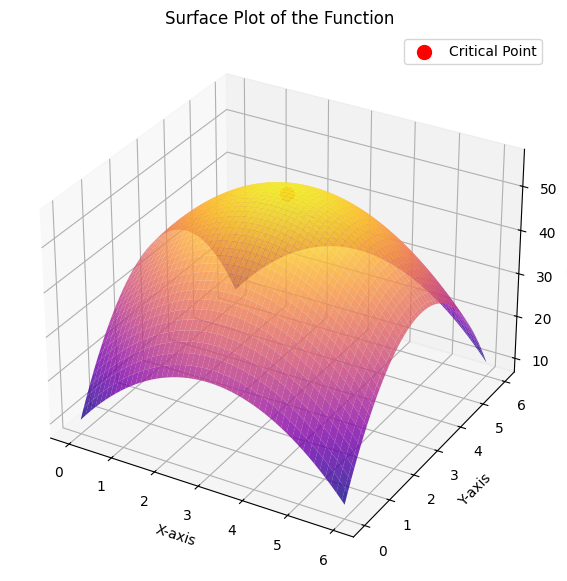

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return -2*x**2 - 3*y**2 + 12*x + 18*y + 10

x_vals = np.linspace(0, 6, 100)
y_vals = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)

Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)

critical_x = 3  
critical_y = 3  
Z_critical = f(critical_x, critical_y)
ax.scatter(critical_x, critical_y, Z_critical, color='red', s=100, label='Critical Point')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Surface Plot of the Function')
ax.legend()

plt.show()

## Local Minimum

$$
\text{If } z_{xx} > 0: \text{ This indicates that the function is concave up with respect to } x. \\ 
\text{It suggests that the function is "bending upwards" in the } x \text{ direction.} \\[1em]

\text{If } z_{yy} > 0: \text{ This indicates that the function is concave up with respect to } y. \\[1em]

\text{For a function to have a local minimum at a critical point, you typically want the following conditions to hold:} \\[1em]

1. \text{The first derivatives } z_x \text{ and } z_y \text{ should be zero at that point (indicating a critical point).} \\[1em]

2. \text{The second derivatives should satisfy the following conditions:} \\[1em]
    z_{xx} > 0 \text{ (concave up in the } x \text{ direction)} \\[1em]
    z_{yy} > 0 \text{ (concave up in the } y \text{ direction)} \\[1em]

3. \text{The determinant of the Hessian matrix,} \\[1em]
   H = z_{xx} z_{yy} - (z_{xy})^2, \\[1em]
   \text{ should be positive, which indicates that the critical point is a local minimum.}
$$


## Saddle Point

$$
\text{If } z_{xx} \text{ and } z_{yy} \text{ have opposite signs:} \\ 
\text{This indicates that the function is concave up in one direction and concave down in the other.} \\[1em]

\text{For a function to have a saddle point at a critical point, you typically want the following conditions to hold:} \\[1em]

1. \text{The first derivatives } z_x \text{ and } z_y \text{ should be zero at that point (indicating a critical point).} \\[1em]

2. \text{The second derivatives should satisfy the following conditions:} \\[1em]
    z_{xx} > 0 \text{ (concave up in the } x \text{ direction) or } z_{xx} < 0 \text{ (concave down in the } x \text{ direction)} \\[1em]
    z_{yy} < 0 \text{ (concave down in the } y \text{ direction) or } z_{yy} > 0 \text{ (concave up in the } y \text{ direction)} \\[1em]

3. \text{The determinant of the Hessian matrix,} \\[1em]
   H = z_{xx} z_{yy} - (z_{xy})^2, \\[1em]
   \text{ should be negative, which indicates that the critical point is a saddle point.}
$$


## Example

The function is given by:

$$
f(x, y) = 5x^2 - 3y^2 - 30x + 7y + 4xy
$$

In [30]:
import sympy as sp

x, y = sp.symbols('x y')

f = 5*x**2 - 3*y**2 - 30*x + 7*y + 4*x*y

f_x = sp.diff(f, x)
f_y = sp.diff(f, y)

critical_points = sp.solve((f_x, f_y), (x, y))

f_xx = sp.diff(f_x, x)
f_yy = sp.diff(f_y, y)
f_xy = sp.diff(f_x, y)

print("Critical Points:", critical_points)

if isinstance(critical_points, dict):
    point = (critical_points[x], critical_points[y])
    H = sp.Matrix([[f_xx.subs({x: point[0], y: point[1]}), f_xy.subs({x: point[0], y: point[1]})],
                    [f_xy.subs({x: point[0], y: point[1]}), f_yy.subs({x: point[0], y: point[1]})]])
    
    H_value = H.det()
    f_xx_value = f_xx.subs({x: point[0], y: point[1]})
    f_yy_value = f_yy.subs({x: point[0], y: point[1]})

    print(f"At point {point}: H = {H}, Determinant = {H_value}, f_xx = {f_xx_value}, f_yy = {f_yy_value}")

    if H_value > 0 and f_xx_value < 0 and f_yy_value < 0:
        print("This critical point is a local maximum.")
    elif H_value > 0 and f_xx_value > 0 and f_yy_value > 0:
        print("This critical point is a local minimum.")
    elif H_value < 0:
        print("This critical point is a saddle point.")
    else:
        print("This critical point is inconclusive.")
else:
    print("No critical points found.")

Critical Points: {x: 2, y: 5/2}
At point (2, 5/2): H = Matrix([[10, 4], [4, -6]]), Determinant = -76, f_xx = 10, f_yy = -6
This critical point is a saddle point.


## sp.Matrix()

- Creating a Matrix: You can create a matrix by passing a list of lists (where each inner list represents a row) to the sp.Matrix() function.



In [41]:
# Creating a 2x2 matrix
A = sp.Matrix([[1, 2], [3, 4]])
print(A)

Matrix([[1, 2], [3, 4]])


- Creating a Matrix with Symbols: You can also create a matrix using symbolic variables.

In [42]:
x, y, z = sp.symbols('x y z')
B = sp.Matrix([[x, y], [z, 1]])
print(B)

Matrix([[x, y], [z, 1]])


## Operations on Matrices

### Matrix Addition:

In [43]:
C = sp.Matrix([[5, 6], [7, 8]])
D = A + C
print(D)

Matrix([[6, 8], [10, 12]])


### Matrix Multiplication:

In [44]:
E = A * C
print(E)

Matrix([[19, 22], [43, 50]])


### Transpose:

In [45]:
F = A.transpose()
print(F)

Matrix([[1, 3], [2, 4]])


### Determinant:

In [46]:
det_A = A.det()
print(det_A)

-2


### Inverse:

In [47]:
inv_A = A.inv()
print(inv_A)

Matrix([[-2, 1], [3/2, -1/2]])


### Accessing Elements

In [ ]:
# Accessing the element in the first row, second column
element = A[0, 1]
print(element)  

2


## Plotting

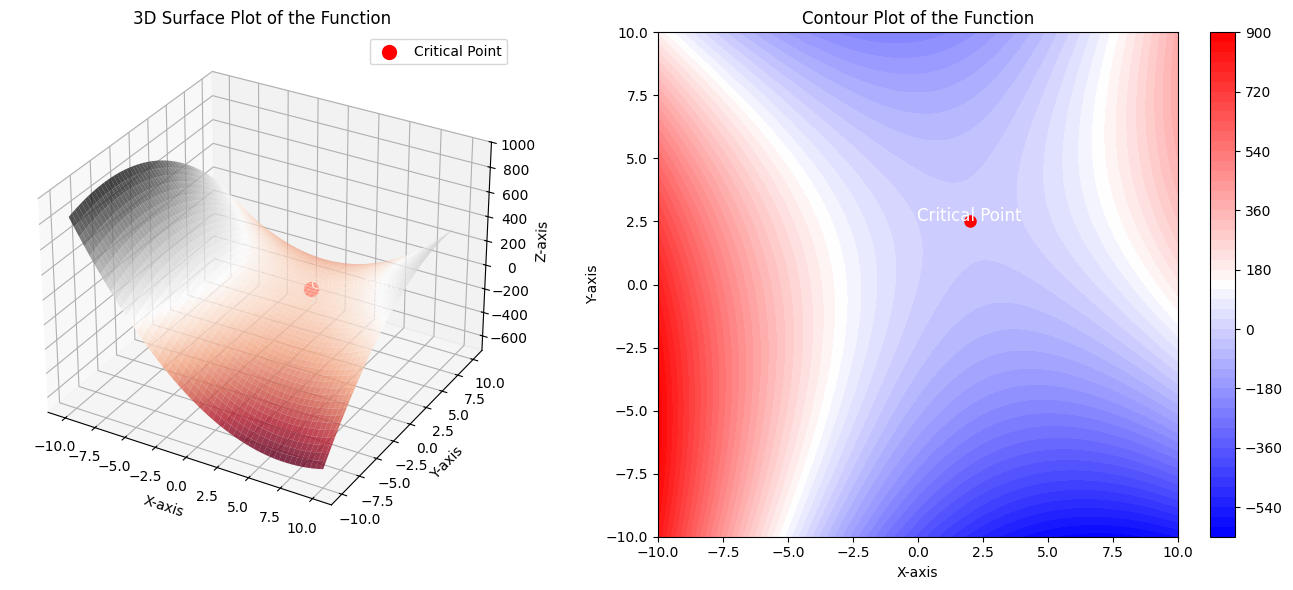

In [34]:
def f_func(x, y):
    return 5*x**2 - 3*y**2 - 30*x + 7*y + 4*x*y

x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

Z = f_func(X, Y)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='RdGy', alpha=0.8)

critical_x = 2  
critical_y = 5/2  
Z_critical = f_func(critical_x, critical_y)
ax1.scatter(critical_x, critical_y, Z_critical, color='red', s=100, label='Critical Point')
ax1.text(critical_x, critical_y, Z_critical, 'Critical Point', color='white')

ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_title('3D Surface Plot of the Function')
ax1.legend()

ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=50, cmap='bwr')
plt.colorbar(contour)

ax2.plot(critical_x, critical_y, 'ro', markersize=8)  #red dot for critical point
ax2.text(critical_x, critical_y, 'Critical Point', fontsize=12, color='white', ha='center')

ax2.set_title('Contour Plot of the Function')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')

plt.tight_layout()
plt.show()


# Exercise

1. The following code produces error. Explain the error and fix it and explain your solution.

In [ ]:
import sympy as sp
x, y = sp.symbols('x y')
f = 5*x**2 - 3*y**2 - 30*x + 7*y + 4*x*y
f_x = sp.diff(f, x)
f_y = sp.diff(f, y)
critical_points = sp.solve((f_x, f_y), (x, y))
f_xx = sp.diff(f_x, x)
f_yy = sp.diff(f_y, y)
f_xy = sp.diff(f_x, y)
Hessian = sp.Matrix([[f_xx, f_xy], [f_xy, f_yy]])
hessian_evaluations = [(point, Hessian.subs({x: point[0], y: point[1]})) for point in critical_points]
critical_points, hessian_evaluations

TypeError: 'Symbol' object is not subscriptable

2. solve the following function. check whether it has local maximum, local minimum, or saddle point. Plot the function and show the critical point.

$$
f(x, y) = 2x^2 - 3y^2 - 4x + 6y + 5
$$

3. Solve the following system of equations:

$$
x+2y+3z=9 \\
2x+y−z=32x+y−z=3 \\
3x−4y+z=−23x−4y+z=−2 \\
$$

hint:
$$
X = A^{-1} B
$$


